In [1]:
# Importar las librerías
import pandas as pd

# Leer el archivo
df_games = pd.read_csv('dataset_videojuegos.csv')
df_games.head()

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9


In [3]:
df_games

,name,platform,release_date,summary,meta_score,user_review
0,The Legend of Zelda: Ocarina of Time,Nintendo 64,"November 23, 1998","As a young boy, Link is tricked by Ganondorf, ...",99,9.1
1,Tony Hawk's Pro Skater 2,PlayStation,"September 20, 2000",As most major publishers' development efforts ...,98,7.4
2,Grand Theft Auto IV,PlayStation 3,"April 29, 2008",[Metacritic's 2008 PS3 Game of the Year; Also ...,98,7.7
3,SoulCalibur,Dreamcast,"September 8, 1999","This is a tale of souls and swords, transcendi...",98,8.4
4,Grand Theft Auto IV,Xbox 360,"April 29, 2008",[Metacritic's 2008 Xbox 360 Game of the Year; ...,98,7.9
...,...,...,...,...,...,...
18795,Fast & Furious: Showdown,Xbox 360,"May 21, 2013",Fast & Furious: Showdown takes some of the fra...,22,1.3
18796,Drake of the 99 Dragons,Xbox,"November 3, 2003",Drake is out for revenge in a supernatural Hon...,22,1.7
18797,Afro Samurai 2: Revenge of Kuma Volume One,PlayStation 4,"September 22, 2015","Head out on a journey of redemption, driven by...",21,2.9
18798,Infestation: Survivor Stories (The War Z),PC,"October 15, 2012","(Formerly known as ""The War Z"") It has been 5 ...",20,1.7


In [5]:
# Ver la información general
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18800 entries, 0 to 18799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          18800 non-null  object
 1   platform      18800 non-null  object
 2   release_date  18800 non-null  object
 3   summary       18686 non-null  object
 4   meta_score    18800 non-null  int64 
 5   user_review   18800 non-null  object
dtypes: int64(1), object(5)
memory usage: 881.4+ KB


In [7]:
# verificar si existen filas repetidas, en este caso, no hay ninguna.
duplicadas = df_games.duplicated().sum()
duplicadas

0

In [9]:
# Verificar si existen nulos, en este caso, solo tiene nulos 'summary'
print(df_games.isnull().sum())

name              0
platform          0
release_date      0
summary         114
meta_score        0
user_review       0
dtype: int64


In [11]:
# Muestra en el dataset cuáles son los nulos de summary
filas_nulas = df_games[df_games['summary'].isnull()]
print(filas_nulas)


                                        name           platform  \
833           Injustice 2: Legendary Edition      PlayStation 4   
1472                      Moto Racer Advance   Game Boy Advance   
1535                              Mini Metro             Switch   
1649             Out of the Park Baseball 13                 PC   
2427              Guild Wars 2: Path of Fire                 PC   
...                                      ...                ...   
17999         One Piece: Unlimited Cruise SP      PlayStation 4   
18134                        AeternoBlade II              Wii U   
18253  Surgeon Simulator: Experience Reality      PlayStation 4   
18532                    The Ripping Friends   Game Boy Advance   
18717                      Smash 'N' Survive      PlayStation 3   

             release_date summary  meta_score user_review  
833        March 27, 2018     NaN          88         7.6  
1472     December 5, 2002     NaN          86         tbd  
1535      Augus

In [13]:
# Muestra los índices de los nulos de summary
indices_nulos = df_games[df_games['summary'].isnull()].index
print(indices_nulos)


Index([  833,  1472,  1535,  1649,  2427,  2730,  3047,  3437,  3482,  3559,
       ...
       17281, 17359, 17631, 17672, 17731, 17999, 18134, 18253, 18532, 18717],
      dtype='int64', length=114)


In [23]:
# Rellenar los nulos con palabras en español (para identificar que se cambiaron) 
df_games['summary'] = df_games['summary'].fillna("Sin descripción.")


In [25]:
# Revisar uno de los índices que se cambiaron para revisar si ahora esta 'Sin descripción.'
df_games.iloc[833]


name            Injustice 2: Legendary Edition
platform                         PlayStation 4
release_date                    March 27, 2018
summary                       Sin descripción.
meta_score                                  88
user_review                                7.6
Name: 833, dtype: object

In [27]:
# convertir las fechas correctamente y reemplazar valores inválidos con NaT
df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')


In [29]:
# Mostrar cuántos valores NaT hay
df_games['release_date'].isna().sum()


0

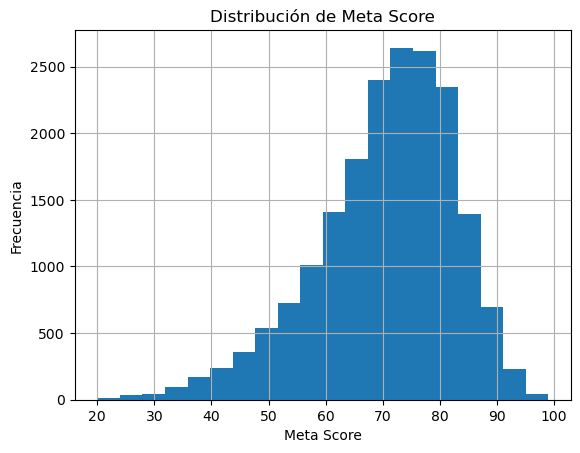

In [32]:
#Una histograma y boxplot para ver cómo se distribuyen las puntuaciones de los juegos
# Histograma
import matplotlib.pyplot as plt
df_games['meta_score'].hist(bins=20)
plt.title('Distribución de Meta Score')
plt.xlabel('Meta Score')
plt.ylabel('Frecuencia')
plt.show()


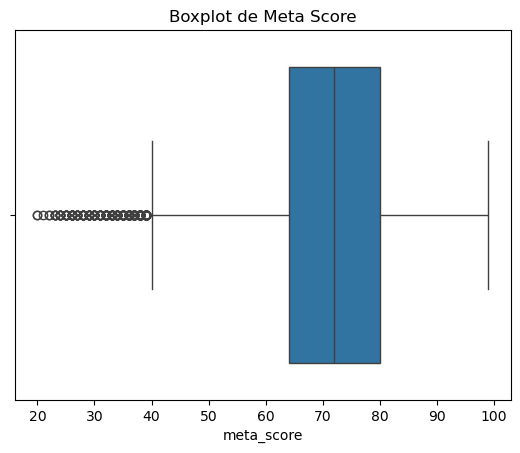

In [34]:
#Boxplot para ver valores atípicos
import seaborn as sns
sns.boxplot(x=df_games['meta_score'])
plt.title('Boxplot de Meta Score')
plt.show()


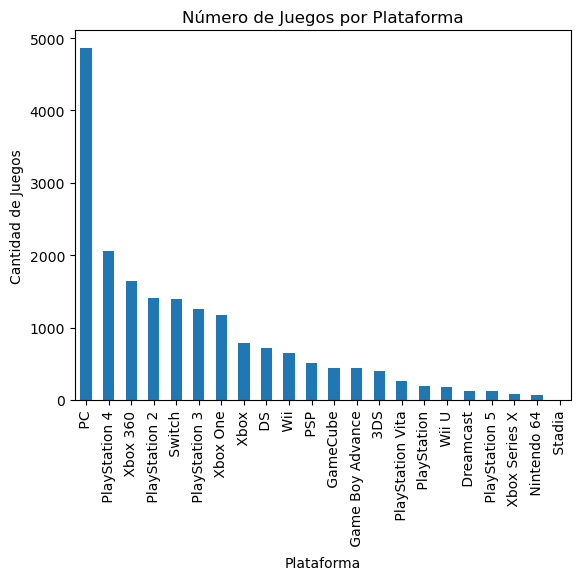

In [36]:
# Un gráfico de barras para ver cuántos juegos están disponibles en cada plataforma
platform_counts = df_games['platform'].value_counts()
platform_counts.plot(kind='bar')
plt.title('Número de Juegos por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Cantidad de Juegos')
plt.show()


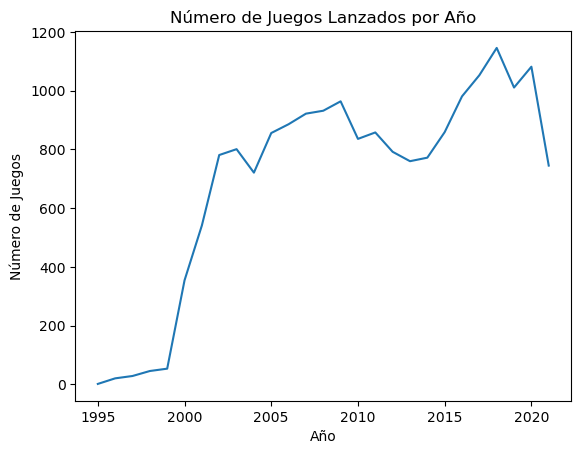

In [38]:
# un gráfico de líneas para ver cómo se distribuyen los lanzamientos a lo largo del tiempo
df_games['release_date'] = pd.to_datetime(df_games['release_date'], errors='coerce')
df_games['release_date'].dropna().dt.year.value_counts().sort_index().plot(kind='line')
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año')
plt.ylabel('Número de Juegos')
plt.show()
